<a href="https://colab.research.google.com/github/egabrielvice/DATA602_ipynb/blob/9/assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 9**

In [ ]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [ ]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()


**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [ ]:
target_names = list(iris.target_names)
target_names

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [ ]:
def iris_knn_accuracy(split, neighbors):
    X_train, X_test, y_train, y_test = tts(
        iris.data,
        iris.target,
        test_size=split,
        random_state=42
    )

    knn = KNN(n_neighbors=neighbors)
    knn.fit(X_train, y_train)

    accuracy = knn.score(X_test, y_test)
    return accuracy

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [ ]:
train_scores = []
test_scores = []
k_values = range(1, 31)

X_train, X_test, y_train, y_test = tts(
    iris.data,
    iris.target,
    test_size=0.3,
    random_state=7
)

for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

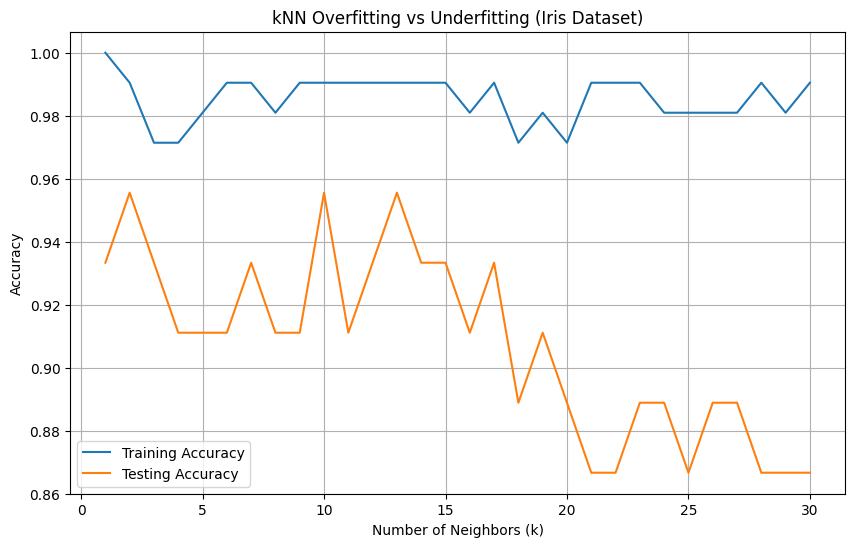

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label="Training Accuracy")
plt.plot(k_values, test_scores, label="Testing Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Overfitting vs Underfitting (Iris Dataset)")
plt.legend()
plt.grid(True)
plt.show()

Training accuracy is highest when the number of neighbors is small, indicating a highly flexible model that closely fits the training data and is prone to overfitting. As the value of k increases, training accuracy gradually decreases, reflecting increased bias and a smoother decision boundary. Testing accuracy reaches its highest levels at moderate values of k and declines for larger values, demonstrating underfitting as the model becomes overly generalized. This pattern clearly illustrates the bias–variance tradeoff in kNN classification and shows the importance of selecting an appropriate number of neighbor.